In [5]:
import torch
from torch import nn 
from torch.functional import F
from torchvision.datasets import MNIST
import torchvision.transforms as transforms



import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
from torchvision.datasets import MNIST, CIFAR10  # CIFAR10もインポートしておく
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## データ読み込み

- PyTorchではデータを受け取る前に**torchvision.transform**(前処理機)を呼び出して定義する。
- リストを渡すことでその順番で前処理を行ってくれる。

参考: https://pystyle.info/pytorch-list-of-transforms/

Memo: tensorflowでいうところのいうところのto_categoricalは不要と思われる

In [3]:

transform = transforms.Compose(
    [
        transforms.ToTensor(), # テンソル化
        transforms.Normalize(  # 正規化
            (0.5, 0.5, 0.5), # 平均
            (0.5, 0.5, 0.5)  # 標準偏差
        )
    ]
)

- データセット: **torchvision.datasets**に用意されている。trainset[idx]のような形でデータセットを取り出すことが可能
- **torch.utils.data.DataLoader**: データセットからミニバッチを作成するクラス。イテレートした時にそのミニバッチを返してくれる。
- train引数がTrueかFalseかでトレイン・テストが別れている

参考: https://pystyle.info/pytorch-dataloader/

In [6]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = MNIST('./data', train=True, transform=transform, download=True)
testset = MNIST('./data', train=False, transform=transform, download=True)

batch_size = 50
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [7]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [8]:
trainset.data.dtype

torch.uint8

## データ成形

In [9]:
trainset[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [10]:
trainset.data.shape

torch.Size([60000, 28, 28])

## 画像の表示

1. 前述のように、**torchvision.utils.DataLoader**がイテレーティブであることを利用して、DataLoaderオブジェクトをイテレーティブに呼び出す
    (表示される画像が毎回変わるはず)
2. データセットから直接呼び出す

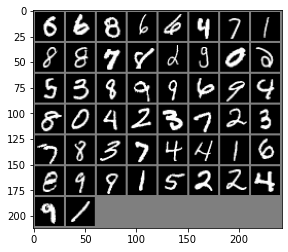

In [12]:
def imshow(img):
    img = torchvision.utils.make_grid(img)
    img = img / 2 + 0.5
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

iterator = iter(trainloader)
x, _ = next(iterator)
imshow(x)

## モデル実装

In [48]:
trainset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
# https://teratail.com/questions/317877
# 

In [53]:
class VAE(nn.Module):
    def __init__(self):
        super().__init__()
        
        # flatten
        self.encoder_conv_0=nn.Conv2d(1, 28, kernel_size=3, stride=1, padding=1)
        self.encoder_conv_1=nn.Conv2d(28, 56, kernel_size=3, stride=2, padding=1)
        self.encoder_conv_2=nn.Conv2d(56, 56, kernel_size=3, stride=2, padding=1)
        self.encoder_conv_3=nn.Conv2d(56, 56, kernel_size=3, stride=1, padding=1)
    
        self.leaky_re_lu_0=nn.LeakyReLU()
        self.leaky_re_lu_1=nn.LeakyReLU()
        self.leaky_re_lu_2=nn.LeakyReLU()
        self.leaky_re_lu_3=nn.LeakyReLU()
        
        self.flatten=nn.Flatten()
        
        self.mu = nn.Linear(2744, 1)
        self.log_dense = nn.Linear(2744, 1)
        
        # self.encoder_output = self.mu, self.enco
        
        
        
        # 出力層
#         self.linear=nn.Linear(3136, n_class)
    
    def sampling(self):
        pass
    
    def forward(self, x):
        out = self.encoder_conv_0(x)
        out = self.leaky_re_lu_0(out)
        
        out = self.encoder_conv_1(out)
        out = self.leaky_re_lu_1(out)
        
        out = self.encoder_conv_2(out)
        out = self.leaky_re_lu_2(out)
        
        out = self.encoder_conv_3(out)
        out = self.leaky_re_lu_3(out)
        
        out = self.flatten(out)
                
        val_mu = self.mu(out)
        val_log_dense = self.log_dense(out)
        
        return val_mu, val_log_dense
        

In [76]:
class Decoder(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear_0 = nn.Linear(input_size, 3136)
        self.conv_0 = nn.Conv2d(28, 56, kernel_size=3, stride=2, padding=1)
        self.linear_1 = nn.Linear(28, 10)
        self.tanh = torch.tanh(10,10)
                                                            
    def forward(self, x):
        out = self.linear_0(x)
        out = self.conv_0(x)
        out = self.linear_1(x)
        out = self.tanh(x)
        return out

In [32]:
criterion = nn.CrossEntropyLoss()

In [33]:
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [70]:
encoder = VAE()
output = encoder(inputs)

In [74]:
output[0].shape

torch.Size([50, 1])

In [77]:
decoder = Decoder(50)

TypeError: tanh() takes 1 positional argument but 2 were given

In [34]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [54]:
model = VAE()

In [59]:
model(inputs)[0]

torch.Size([50, 1])

In [18]:
# PyTorchは各機能がコンポーネントとして提供されているのみであり、学習ループは自分で実装しないといけない。
# 参考：https://qiita.com/Rahariku/items/69b512fad60242fbd6ac#mnist%E3%83%87%E3%83%BC%E3%82%BF%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%81%BF
for epoch in range(5):
    print(f"Epoch {epoch+1}/5")
    for idx, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        output = model(inputs)
        #     loss = criterion(output, labels)
        #     loss.backward()
        optimizer.step()
        break
    break
    

Epoch 1/5


NameError: name 'optimizer' is not defined

In [ ]:
loss.item()

In [ ]:
import tqdm

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
outputs = []
ys = []

model.eval()
model = model.to(device)

with tqdm(testloader, desc=f'[Batch 0000] Loss:0.000', leave=True) as batch_iter:
    for batch_idx, (images, labels) in enumerate(batch_iter):

        images = images.to(device)
        with torch.no_grad():
            out = model(images)
            outputs += [o.item() for o in out.cpu().argmax(dim=-1)]
            ys += [l.squeeze().item() for l in labels]

In [ ]:
accuracy = accuracy_score(ys, outputs)
print(f'accuracy: {accuracy:0.3f}')

In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(testloader)), n_to_show)

fig = plt.figure(figsize=(20,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
  

for i, idx in enumerate(trainloader):
    img, label = testloader[idx]
    img = img.clip(min=0.0, max=1.0).numpy()
    img = np.transpose(img, (1, 2, 0))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(output_classes[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'true= ' + str(actual_classes[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)

In [ ]:

# 参考: https://qiita.com/Rahariku/items/69b512fad60242fbd6ac#mnist%E3%83%87%E3%83%BC%E3%82%BF%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%81%BF

In [ ]:
import matplotlib.pyplot as plt
import numpy as np